In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [1]:
df = pd.read_csv('weatherAUsS.csv', parse_dates=['Date'], index_col=['Date'])
df.head()

NameError: name 'pd' is not defined

In [3]:
df['RainToday'] = df['RainToday'].map({'No':1, 'Yes':2})

In [4]:
# df.drop(['Location','Pressure3pm','Pressure9am'], axis=1, inplace=True)
df.drop(['Location'], axis=1, inplace=True)

In [5]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
Date,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,44,20,24,71,22,1007.7,1007.1,16.9,21.8,1
2008-12-02,7.4,25.1,0.0,44,4,22,44,25,1010.6,1007.8,17.2,24.3,1
2008-12-03,12.9,25.7,0.0,46,19,26,38,30,1007.6,1008.7,21.0,23.2,1
2008-12-04,9.2,28.0,0.0,24,11,9,45,16,1017.6,1012.8,18.1,26.5,1
2008-12-05,17.5,32.3,1.0,41,7,20,82,33,1010.8,1006.0,17.8,29.7,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3040 entries, 2008-12-01 to 2017-06-25
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3040 non-null   float64
 1   MaxTemp        3040 non-null   float64
 2   Rainfall       3040 non-null   float64
 3   WindGustSpeed  3040 non-null   int64  
 4   WindSpeed9am   3040 non-null   int64  
 5   WindSpeed3pm   3040 non-null   int64  
 6   Humidity9am    3040 non-null   int64  
 7   Humidity3pm    3040 non-null   int64  
 8   Pressure9am    3040 non-null   float64
 9   Pressure3pm    3040 non-null   float64
 10  Temp9am        3040 non-null   float64
 11  Temp3pm        3040 non-null   float64
 12  RainToday      3040 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 332.5 KB


Text(0.5, 1.0, 'Weather')

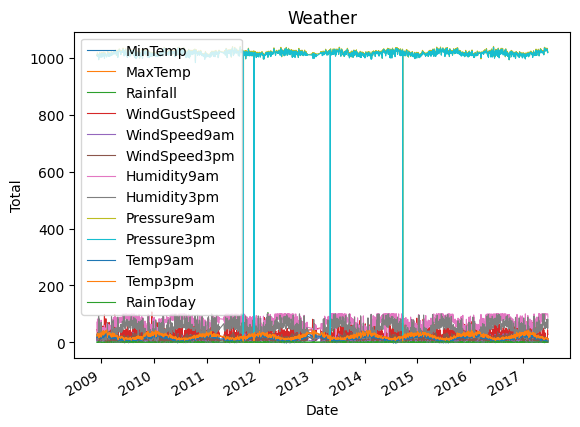

In [7]:
ax = df.plot(linewidth = 0.8) 
ax.set_xlabel('Date')
ax.set_ylabel('Total')
ax.set_title('Weather')

<AxesSubplot: xlabel='Date'>

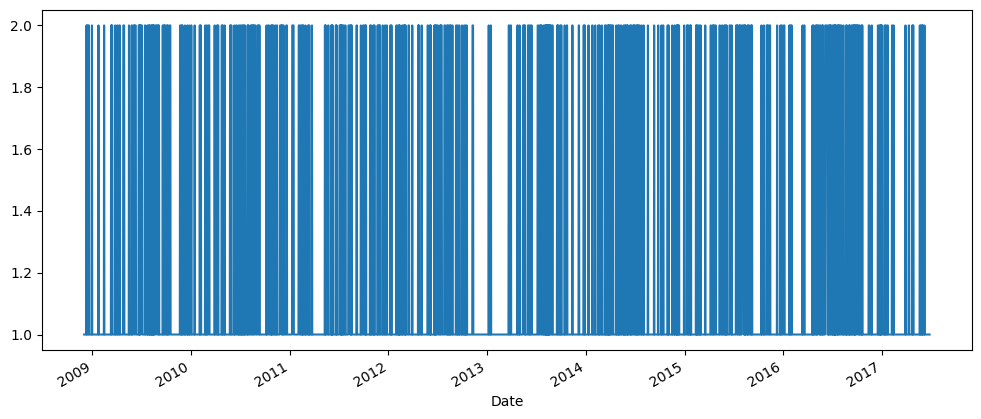

In [8]:
df['RainToday'].plot(figsize=(12,5))

In [28]:
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print('ADF: ', dftest[0])
  print('P-Value: ', dftest[1])
  print('Num of Lags: ', dftest[2])
  print('Num of Observations Used for ADF Regression and Critical Values Calculation: ', dftest[3])
  print('Critical Values: ')
  for key, val in dftest[4].items():
    print('\t', key, ': ', val)

In [29]:
ad_test(df['RainToday'])

ADF:  -27.160575837945053
P-Value:  0.0
Num of Lags:  2
Num of Observations Used for ADF Regression and Critical Values Calculation:  3037
Critical Values: 
	 1% :  -3.4325050331831117
	 5% :  -2.862492156233158
	 10% :  -2.5672768570714237


In [30]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df.iteritems():
    adfuller_test(column, name=column.name)

 MinTemp : P-Value = 0.008 => Stationary. 
 MaxTemp : P-Value = 0.004 => Stationary. 
 Rainfall : P-Value = 0.0 => Stationary. 
 WindGustSpeed : P-Value = 0.0 => Stationary. 
 WindSpeed9am : P-Value = 0.0 => Stationary. 
 WindSpeed3pm : P-Value = 0.0 => Stationary. 
 Humidity9am : P-Value = 0.011 => Stationary. 
 Humidity3pm : P-Value = 0.004 => Stationary. 
 Pressure9am : P-Value = 0.0 => Stationary. 
 Pressure3pm : P-Value = 0.0 => Stationary. 
 Temp9am : P-Value = 0.014 => Stationary. 
 Temp3pm : P-Value = 0.032 => Stationary. 
 RainToday : P-Value = 0.0 => Stationary. 


In [31]:
#1st diferentiation
data_differenced = df.diff().dropna()
for name, column in data_differenced.iteritems():
    adfuller_test(column, name=column.name)

 MinTemp : P-Value = 0.0 => Stationary. 
 MaxTemp : P-Value = 0.0 => Stationary. 
 Rainfall : P-Value = 0.0 => Stationary. 
 WindGustSpeed : P-Value = 0.0 => Stationary. 
 WindSpeed9am : P-Value = 0.0 => Stationary. 
 WindSpeed3pm : P-Value = 0.0 => Stationary. 
 Humidity9am : P-Value = 0.0 => Stationary. 
 Humidity3pm : P-Value = 0.0 => Stationary. 
 Pressure9am : P-Value = 0.0 => Stationary. 
 Pressure3pm : P-Value = 0.0 => Stationary. 
 Temp9am : P-Value = 0.0 => Stationary. 
 Temp3pm : P-Value = 0.0 => Stationary. 
 RainToday : P-Value = 0.0 => Stationary. 


<AxesSubplot: xlabel='Date'>

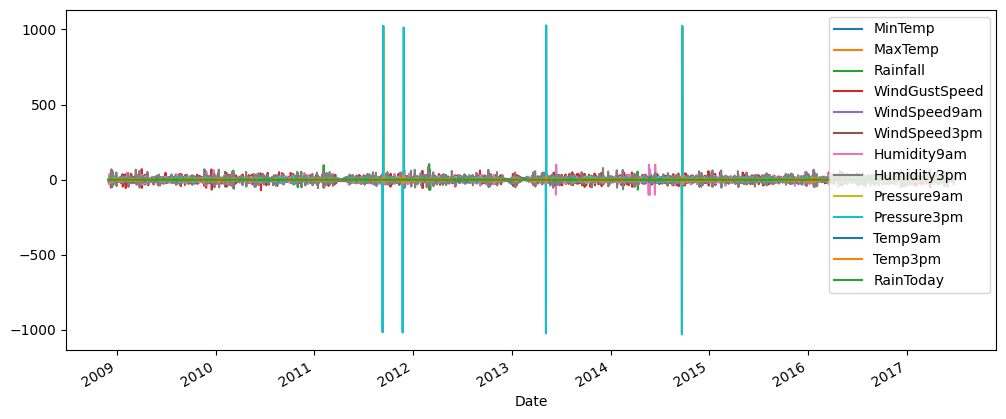

In [13]:
data_differenced.plot(figsize=(12,5))

<AxesSubplot: xlabel='Date'>

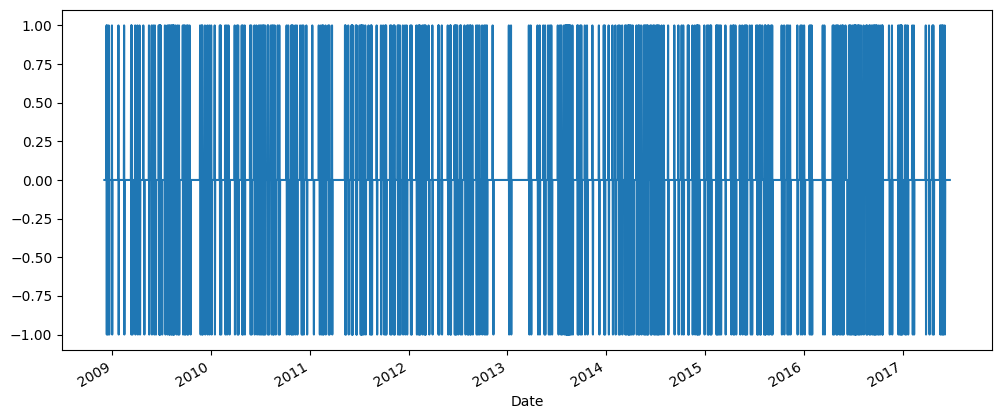

In [14]:
data_differenced['RainToday'].plot(figsize=(12,5))

In [35]:
import pmdarima as pm
from pmdarima import auto_arima
#Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:
stepwise_fit = auto_arima(df['RainToday'], trace=True, surpress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2833.524, Time=4.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3093.498, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2831.921, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2849.796, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10074.786, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2833.869, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2833.853, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2835.767, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4058.622, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 6.460 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3040
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1412.960
Date:                Thu, 05 Jan 2023   AIC     

In [17]:
x = df.drop('RainToday', axis=1)
y = df['RainToday']

In [18]:
from sklearn.model_selection import train_test_split
# Split dataset menjadi training set and test set dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
print(y_train)

Date
2011-09-29    2
2012-09-05    1
2016-06-13    1
2011-03-10    2
2009-07-10    1
             ..
2016-09-22    1
2011-06-24    1
2012-01-01    1
2009-07-24    1
2011-11-27    2
Name: RainToday, Length: 2432, dtype: int64


In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

(3040, 13)
(3020,) (20,)


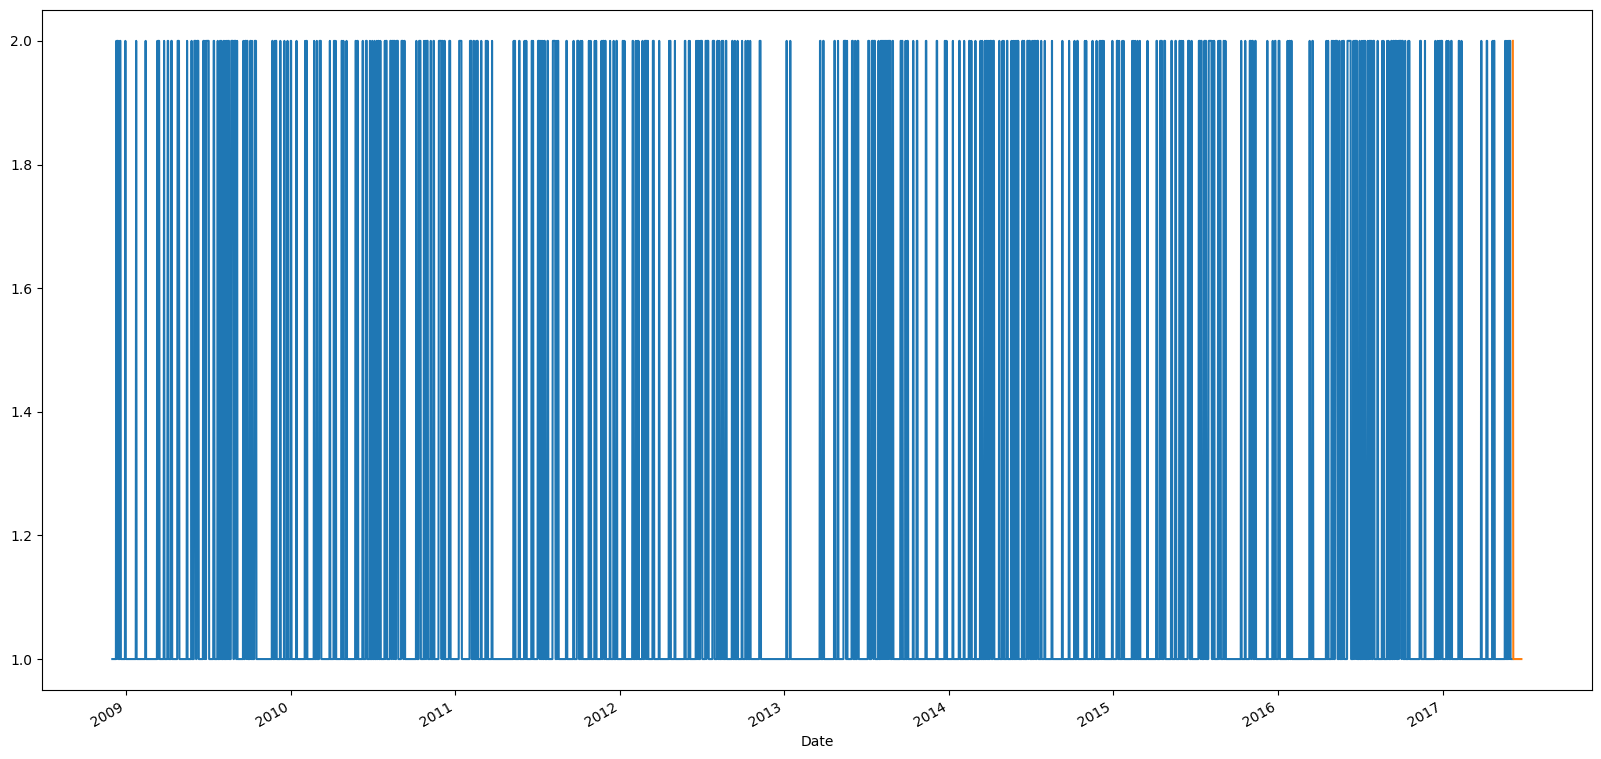

In [20]:
series = df['RainToday']
train, test = series[:-20], series[-20:]
n = len(df)
n_train = len(train)
n_test = len(test)

print(df.shape)
fig, ax = plt.subplots(figsize=(20,10))
train.plot(ax=ax)
test.plot(ax=ax)
print(train.shape, test.shape)


In [21]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(1,1,1))
model=model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:              RainToday   No. Observations:                 3020
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1413.699
Date:                Thu, 05 Jan 2023   AIC                           2833.397
Time:                        00:43:31   BIC                           2851.435
Sample:                             0   HQIC                          2839.883
                               - 3020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2732      0.015     17.926      0.000       0.243       0.303
ma.L1         -0.9860      0.003   -330.226      0.000      -0.992      -0.980
sigma2         0.1492      0.004     41.567      0.0

In [22]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

pred.index=df.index[start:end+1]
print(pred)

Date
2017-06-06    1.105136
2017-06-07    1.133860
2017-06-08    1.141708
2017-06-09    1.143852
2017-06-10    1.144438
2017-06-11    1.144598
2017-06-12    1.144641
2017-06-13    1.144653
2017-06-14    1.144657
2017-06-15    1.144657
2017-06-16    1.144658
2017-06-17    1.144658
2017-06-18    1.144658
2017-06-19    1.144658
2017-06-20    1.144658
2017-06-21    1.144658
2017-06-22    1.144658
2017-06-23    1.144658
2017-06-24    1.144658
2017-06-25    1.144658
Name: ARIMA Predictions, dtype: float64


In [23]:
print(test)

Date
2017-06-06    2
2017-06-07    1
2017-06-08    1
2017-06-09    1
2017-06-10    1
2017-06-11    1
2017-06-12    1
2017-06-13    1
2017-06-14    1
2017-06-15    1
2017-06-16    1
2017-06-17    1
2017-06-18    1
2017-06-19    1
2017-06-20    1
2017-06-21    1
2017-06-22    1
2017-06-23    1
2017-06-24    1
2017-06-25    1
Name: RainToday, dtype: int64


<AxesSubplot: xlabel='Date'>

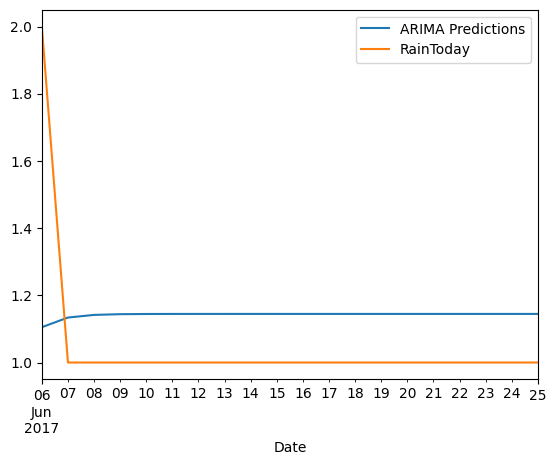

In [24]:
pred.plot(legend=True)
test.plot(legend=True)

In [25]:
from sklearn.metrics import mean_squared_error

mape = np.mean(np.abs(pred-test)/np.abs(test))
mae = np.mean(np.abs(pred-test))
mpe = np.mean((pred-test)/test)
rmse = np.mean((pred-test)**2)**.5
mse = mean_squared_error(pred,test)


import pprint
print('MAPE:',mape)
print('MAE:',mae)
print('MPE:',mpe)
print('MSE:',mse)
print('RMSE:',rmse)

MAPE: 0.15905366116917347
MAE: 0.18142525813147223
MPE: 0.11431046724457605
MSE: 0.05971003601565463
RMSE: 0.24435637093322252
